In [36]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.model_selection import train_test_split
import seaborn as sns

In [37]:
df = pd.read_csv('irrigation-plan.csv')
df

,CROP TYPE,SOIL TYPE,REGION,TEMPERATURE,WEATHER CONDITION,WATER REQUIREMENT
0,BANANA,DRY,DESERT,10-20,NORMAL,8.750
1,BANANA,DRY,DESERT,10-20,SUNNY,10.250
2,BANANA,DRY,DESERT,10-20,WINDY,9.650
3,BANANA,DRY,DESERT,10-20,RAINY,0.750
4,BANANA,DRY,DESERT,20-30,NORMAL,9.850
...,...,...,...,...,...,...
2875,ONION,WET,HUMID,30-40,RAINY,0.100
2876,ONION,WET,HUMID,40-50,NORMAL,4.625
2877,ONION,WET,HUMID,40-50,SUNNY,6.125
2878,ONION,WET,HUMID,40-50,WINDY,5.625


In [38]:
df['CROP TYPE'].value_counts(), df.columns

(CROP TYPE
 BANANA       192
 SOYABEAN     192
 CABBAGE      192
 POTATO       192
 RICE         192
 MELON        192
 MAIZE        192
 CITRUS       192
 BEAN         192
 WHEAT        192
 MUSTARD      192
 COTTON       192
 SUGARCANE    192
 TOMATO       192
 ONION        192
 Name: count, dtype: int64,
 Index(['CROP TYPE', 'SOIL TYPE', 'REGION', 'TEMPERATURE', 'WEATHER CONDITION',
        'WATER REQUIREMENT'],
       dtype='object'))

## We will now be using one hot encoding usin pd.get_dummies as for knn distance calcualtion one hot encoder is recommended.

In [39]:
categorical_features = ['CROP TYPE', 'SOIL TYPE', 'REGION', 'WEATHER CONDITION', 'TEMPERATURE']

df_one = pd.get_dummies(data = df, columns = categorical_features)
df_one.head()

,WATER REQUIREMENT,CROP TYPE_BANANA,CROP TYPE_BEAN,CROP TYPE_CABBAGE,CROP TYPE_CITRUS,CROP TYPE_COTTON,CROP TYPE_MAIZE,CROP TYPE_MELON,CROP TYPE_MUSTARD,CROP TYPE_ONION,...,REGION_SEMI ARID,REGION_SEMI HUMID,WEATHER CONDITION_NORMAL,WEATHER CONDITION_RAINY,WEATHER CONDITION_SUNNY,WEATHER CONDITION_WINDY,TEMPERATURE_10-20,TEMPERATURE_20-30,TEMPERATURE_30-40,TEMPERATURE_40-50
0,8.75,True,False,False,False,False,False,False,False,False,...,False,False,True,False,False,False,True,False,False,False
1,10.25,True,False,False,False,False,False,False,False,False,...,False,False,False,False,True,False,True,False,False,False
2,9.65,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,True,True,False,False,False
3,0.75,True,False,False,False,False,False,False,False,False,...,False,False,False,True,False,False,True,False,False,False
4,9.85,True,False,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,True,False,False


In [40]:
df_corr = df_one.corr(method='spearman')

<Axes: >

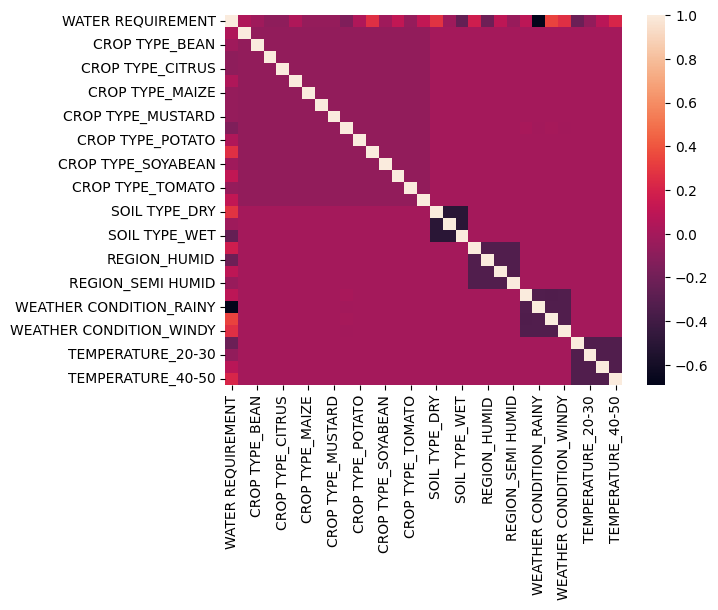

In [41]:
sns.heatmap(data = df_corr)

In [42]:
X = df_one.drop('WATER REQUIREMENT',axis=1)
y = df[df.columns[-1]]
X,y

(      CROP TYPE_BANANA  CROP TYPE_BEAN  CROP TYPE_CABBAGE  CROP TYPE_CITRUS  \
 0                 True           False              False             False   
 1                 True           False              False             False   
 2                 True           False              False             False   
 3                 True           False              False             False   
 4                 True           False              False             False   
 ...                ...             ...                ...               ...   
 2875             False           False              False             False   
 2876             False           False              False             False   
 2877             False           False              False             False   
 2878             False           False              False             False   
 2879             False           False              False             False   
 
       CROP TYPE_COTTON  CROP TYPE_MAI

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)
len(X_train), len(X_test)

(2304, 576)

In [44]:
X_train.columns, y_train

(Index(['CROP TYPE_BANANA', 'CROP TYPE_BEAN', 'CROP TYPE_CABBAGE',
        'CROP TYPE_CITRUS', 'CROP TYPE_COTTON', 'CROP TYPE_MAIZE',
        'CROP TYPE_MELON', 'CROP TYPE_MUSTARD', 'CROP TYPE_ONION',
        'CROP TYPE_POTATO', 'CROP TYPE_RICE', 'CROP TYPE_SOYABEAN',
        'CROP TYPE_SUGARCANE', 'CROP TYPE_TOMATO', 'CROP TYPE_WHEAT',
        'SOIL TYPE_DRY', 'SOIL TYPE_HUMID', 'SOIL TYPE_WET', 'REGION_DESERT',
        'REGION_HUMID', 'REGION_SEMI ARID', 'REGION_SEMI HUMID',
        'WEATHER CONDITION_NORMAL', 'WEATHER CONDITION_RAINY',
        'WEATHER CONDITION_SUNNY', 'WEATHER CONDITION_WINDY',
        'TEMPERATURE_10-20', 'TEMPERATURE_20-30', 'TEMPERATURE_30-40',
        'TEMPERATURE_40-50'],
       dtype='object'),
 1938     6.58
 277      7.30
 1830     7.80
 94       9.90
 2381    12.60
         ...  
 2209     6.39
 2679     0.10
 2301     6.65
 2044     5.52
 1813     9.60
 Name: WATER REQUIREMENT, Length: 2304, dtype: float64)

In [45]:
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

# Create the Decision Tree Regressor model
model = DecisionTreeRegressor(random_state=42)  # Set random state for reproducibility

# Train the model
model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = model.predict(X_test)

# Evaluate the model performance (Mean Squared Error)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 1.0610280815972222


In [10]:
df.head()

,CROP TYPE,SOIL TYPE,REGION,TEMPERATURE,WEATHER CONDITION,WATER REQUIREMENT
0,BANANA,DRY,DESERT,10-20,NORMAL,8.75
1,BANANA,DRY,DESERT,10-20,SUNNY,10.25
2,BANANA,DRY,DESERT,10-20,WINDY,9.65
3,BANANA,DRY,DESERT,10-20,RAINY,0.75
4,BANANA,DRY,DESERT,20-30,NORMAL,9.85


In [ ]:
## R2 describes the fit of the model, the higher the better, Decision Tree has the highest fit and lowest MSE

C:\Users\holla\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


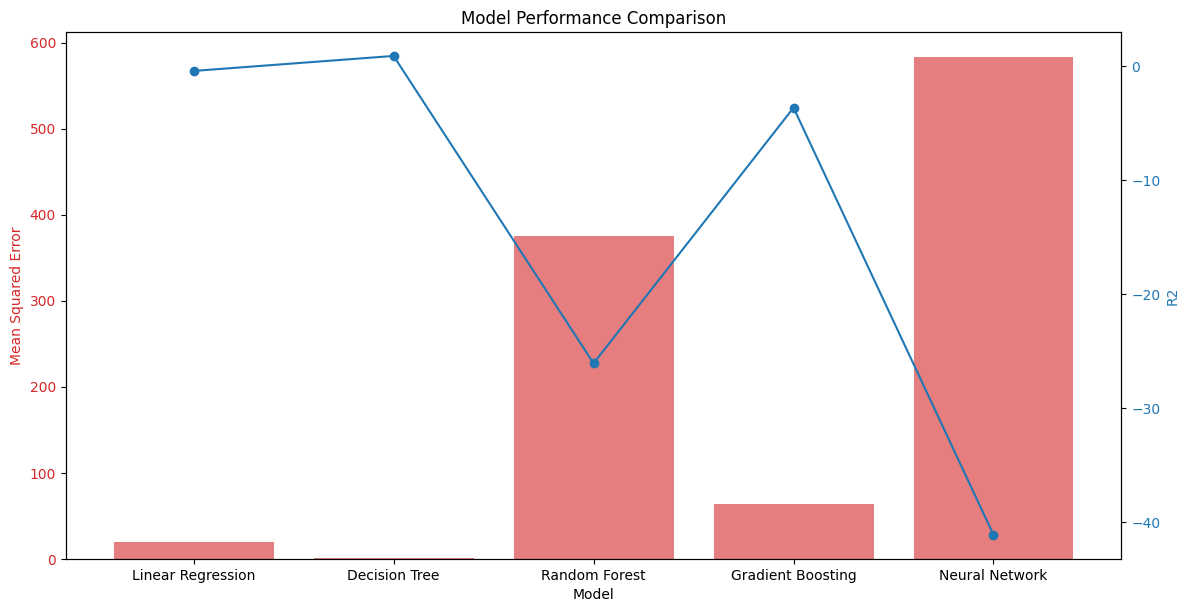

In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Models
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(n_estimators=100, random_state=42),
    "Neural Network": MLPRegressor(hidden_layer_sizes=(50,), max_iter=1000, random_state=42)
}

# Train and evaluate models
results = []
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    results.append((name, mse, r2))

# Plotting the results
results_df = pd.DataFrame(results, columns=['Model', 'MSE', 'R2'])

fig, ax1 = plt.subplots(figsize=(12, 6))

# Plotting MSE
color = 'tab:red'
ax1.set_xlabel('Model')
ax1.set_ylabel('Mean Squared Error', color=color)
ax1.bar(results_df['Model'], results_df['MSE'], color=color, alpha=0.6)
ax1.tick_params(axis='y', labelcolor=color)

# Creating a second y-axis for R2
ax2 = ax1.twinx()
color = 'tab:blue'
ax2.set_ylabel('R2', color=color)
ax2.plot(results_df['Model'], results_df['R2'], color=color, marker='o')
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()
plt.title('Model Performance Comparison')
plt.xticks(rotation=45)
plt.show()

In [48]:
print(results_df)

               Model         MSE         R2
0  Linear Regression   19.259845  -0.391655
1      Decision Tree    1.061028   0.923334
2      Random Forest  374.684883 -26.073528
3  Gradient Boosting   63.985526  -3.623389
4     Neural Network  583.086914 -41.131991


In [11]:
inp = {
    'CROP TYPE':['BANANA'],
    'SOIL TYPE':['DRY'],
    'REGION':['DESERT'],
    'TEMPERATURE':['20-30'],
    'WEATHER CONDITION':['SUNNY']
}

inp = pd.DataFrame(inp)
inp_one = pd.get_dummies(data = inp, columns = categorical_features)
X_train_columns = X_train.columns
inp_one_expanded = pd.DataFrame(False, index=inp_one.index, columns=X_train_columns)
inp_one_expanded[inp_one.columns] = inp_one

In [29]:
model.predict(inp_one_expanded)

array([11.35])

In [13]:
import pickle

with open("model.pkl", "wb") as f:  # Open the file in binary write mode
    pickle.dump(model, f)  # Replace "model" with your trained model object (e.g., knn, rf_model, dt_model)